<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Análisis de los Estadios de vida del Parásito Leishmania</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [6]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [20]:
%pwd

'C:\\Users\\usuario\\Documents\\Analisis_Datos_Quimica'

<font color=green size=5>**Leemos y pegamos todos los espectros de masas, luego los separamos en las intensidades y las relaciones m/z**

In [4]:
import glob
fn = []
all_data3 = pd.DataFrame()
#nombres=['MF']
for f in glob.glob("./Datos/Todos2/*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ' )
    all_data3 = pd.concat([all_data3, df], axis=1)
    fn.append(f) # Guardamos parte del nombre del archivo como una etiqueta de cada muestra
Datamz = all_data3[0] # realciones m/z
Data = all_data3[1] # Intensidades

NameError: name 'pd' is not defined

In [24]:
Data

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=red size=5>**Inspecccionamos y nos damos cuenta que no todos los espectros han sido tomados en el mismo rango de relaciones m/z.  Debemos eliminar los datos faltantes y dejar todos los espectros con el mismo número de datos**

In [26]:
Data.columns=range(Data.shape[1]) # Aquí le ponemos indices ordenados a las columna de las intensidades
#Datamz.columns=range(Datamz.shape[1])
#Datamz=Data[[0]]
Datamz.tail(10241) # Inspeccionamos los datos de la relación m/z al final para saber hasta donde todos tienen datos, observamos que hasta la fila 32255 hay datos
Data

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=blue size=5>**Creamos una nueva tabla de relaciones m/z que solo contenga las filas hasta donde todos los espectros tengan señal**

In [28]:
Dsna=Datamz[0:32256]

Dsna.columns=range(Dsna.shape[1])
Dsna

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,...,659.253,659.253,659.253,659.253,597.613,597.613,597.613,597.613,597.613,597.613
1,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,...,659.369,659.369,659.369,659.369,597.723,597.723,597.723,597.723,597.723,597.723
2,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,...,659.485,659.485,659.485,659.485,597.834,597.834,597.834,597.834,597.834,597.834
3,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,...,659.601,659.601,659.601,659.601,597.944,597.944,597.944,597.944,597.944,597.944
4,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,...,659.717,659.717,659.717,659.717,598.055,598.055,598.055,598.055,598.055,598.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,...,9778.961,9778.961,9778.961,9778.961,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585
32252,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,...,9779.412,9779.412,9779.412,9779.412,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029
32253,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,...,9779.862,9779.862,9779.862,9779.862,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474
32254,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,...,9780.312,9780.312,9780.312,9780.312,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918


<font color=green size=5>**Verificamos que no le hallan quedado casillas sin datos, el resultado es que no quedó ninguno, ningún True**

In [34]:
D=Dsna.isnull().any() # En la tabla D quedan la información booleana (False or True) si hay o no datos perdidos en cada espectro (muestra)
D

0      False
1      False
2      False
3      False
4      False
       ...  
730    False
731    False
732    False
733    False
734    False
Length: 735, dtype: bool

In [36]:
df = D[D[0]==False]
df

KeyError: True

<font color=blue size=5>**Ya seguros de que hasta la fila 32255 no hay espectros sin datos de intensidad, volvemos a construir la tabla de intensidades hasta esa fila**

In [39]:
Dataint=Data[0:32256]
Dataint

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,184.0,47.0,191.0,-11.0,314.0,263.0,301.0,-4.0,-25.0,30.0,...,11.0,-29.0,23.0,-15.0,57.0,32.0,52.0,40.0,-2.0,62.0
32252,200.0,68.0,174.0,10.0,335.0,275.0,301.0,27.0,2.0,53.0,...,6.0,-4.0,-1.0,42.0,14.0,1.0,58.0,42.0,9.0,62.0
32253,229.0,91.0,133.0,10.0,281.0,238.0,261.0,8.0,35.0,93.0,...,3.0,39.0,-13.0,19.0,7.0,-12.0,52.0,35.0,2.0,27.0
32254,226.0,69.0,142.0,-28.0,245.0,310.0,250.0,24.0,32.0,85.0,...,-10.0,33.0,-15.0,43.0,18.0,-4.0,49.0,42.0,16.0,66.0


<font color=red size=5>**Ahora hacemos una visualización de todos los espectros y para nuestro disgusto encontramos que hay algunos espectros a los que no se les realizó línea base**

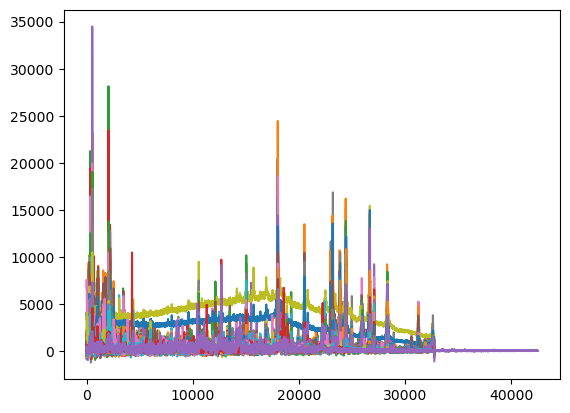

In [42]:
plt.plot(Data);

<font color=blue size=5>**Debemos encontrar esos espectros y eliminarlos de la tabla de datos, hacemos una pequeña rutina**

In [45]:
len(Dataint.columns)

735

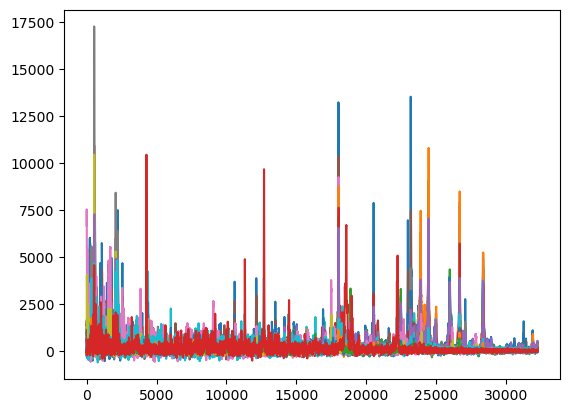

In [47]:
ta=np.arange(0,34)
#fig, axes = plt.subplots(len(ta),1, figsize=(10, 50))
for i in ta:
    #plt.plot(Dataint[458], color='red')
    plt.plot(Dataint[i+700])
    #plt.plot(Dataint[i]);

<font color=blue size=5>**Y LOS ENCONTRAMOS, Estos son los que no tienen línea base, afortunadamente son solo dos, la muestra 458 y 520, tener en cuenta que aquí se empieza a contar desde 1**

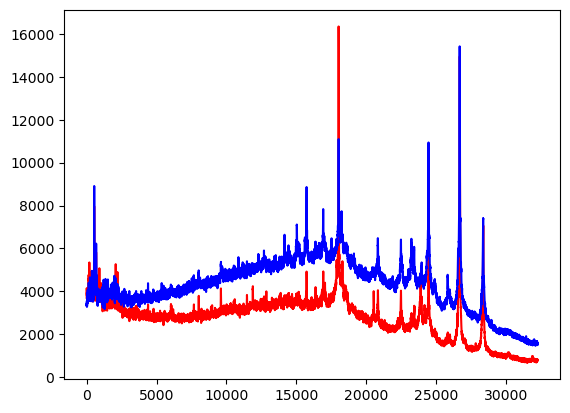

In [50]:
plt.plot(Dataint[520], color='red')
plt.plot(Dataint[458], color='blue')

<font color=green size=5>**Eliminamos los espectros y inspeccionamos con la visualización, observamos que no aparecen esos espectros y quedamos contentos**

In [53]:
ET = pd.read_excel('./Datos/etiquetas.xlsx')
Y=ET[[0]]
Y1=Y.set_axis(['Clase'], axis=1, copy=False)
Y

,0
0,LB3D
1,LB3D
2,LB3D
3,LB7D
4,LP3D
...,...
728,LP3D
729,LP3D
730,LP3D
731,LP3D


<font color=navy size=5>**Graficamos todos los espectros de masas, habiendo eliminado los irregulares**

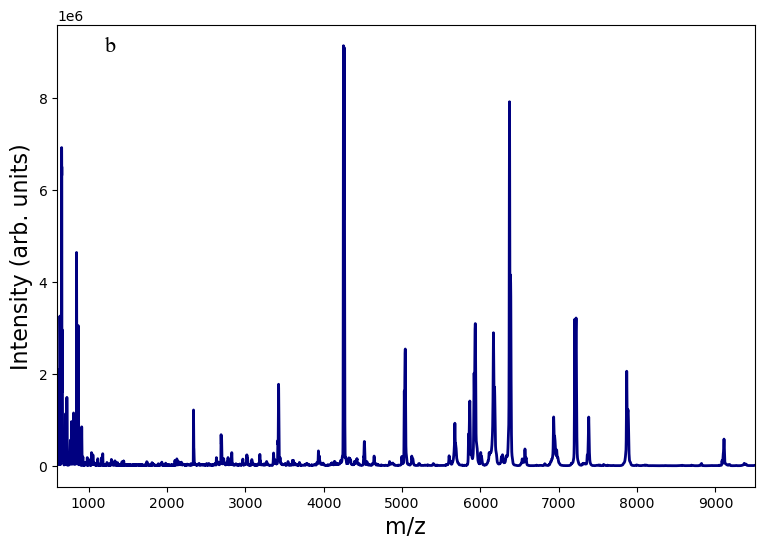

In [56]:
Dsna.columns=range(Dsna.shape[1]) # Aquí le ponemos indices ordenados a las columnsa de las intensidades los espectros defectuosos
Dataintn=Dataint.drop([520, 458], axis=1) # Eliminamos de los datos de intensidad
Dsnan = Dsna.drop([520, 458], axis=1) # Elminamos de los datos de la relación m/z los espectros defectuosos
fn1 = pd.DataFrame(fn).drop([520, 458], axis=0) # Eliminamos de las etiquetas los espectros defectuosos
#plt.plot(Dataintn);
fig, ax = plt.subplots(figsize=(9,6))
#from matplotlib.ticker import MultipleLocator, AutoMinorLocator
#plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(Dsnan[0], np.var(Dataintn, 1), color = 'navy', lw=2, label = 'Variance Mass Spectra')
#ax.legend(loc='best', fontsize=16)
ax.set_xlim(600, 9500)
ax.text(1200,9e6, 'b', fontsize = 16) 
#ax.set_ylim(0, 6000)
ax.set_xlabel('m/z',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("Figure_2b.jpg", dpi=600)
plt.show()

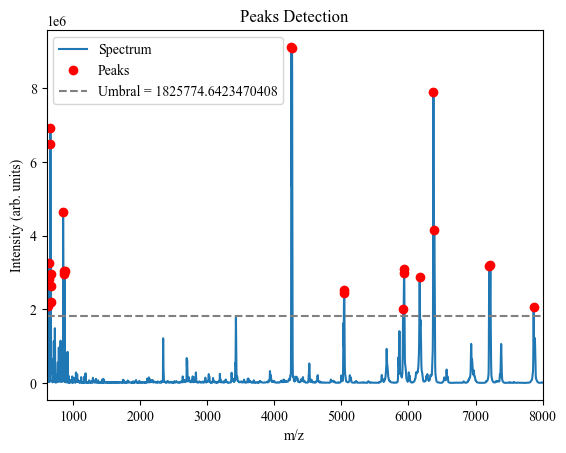

In [109]:
from scipy.signal import find_peaks
sele_data = pd.DataFrame(np.var(Dataintn, 1))
selec_data = sele_data[sele_data[0] > 3e6]
umbral = np.max(np.var(Dataintn, 1))*0.2
ymz = np.var(Dataintn, 1)
xmz = np.array(Dsnan[0])
picos, propiedades = find_peaks(np.var(Dataintn, 1), height=umbral)

# Extraer las alturas de los picos encontrados
alturas = propiedades['peak_heights']

plt.plot(xmz, ymz, label='Spectrum')
plt.plot(xmz[picos], ymz[picos], "ro", label='Peaks')
plt.axhline(umbral, color='gray', linestyle='--', label=f'Umbral = {umbral}')
plt.legend()
plt.xlim(600, 8000)
plt.xlabel('m/z')
plt.ylabel('Intensity (arb. units)')
plt.title('Peaks Detection')
plt.show()

In [91]:
xmz[picos]

array([ 635.326,  657.281,  659.021,  847.452,  868.122,  868.388,
       4253.185, 4262.671, 5935.258, 6371.839, 6383.098, 7204.202,
       7221.203])

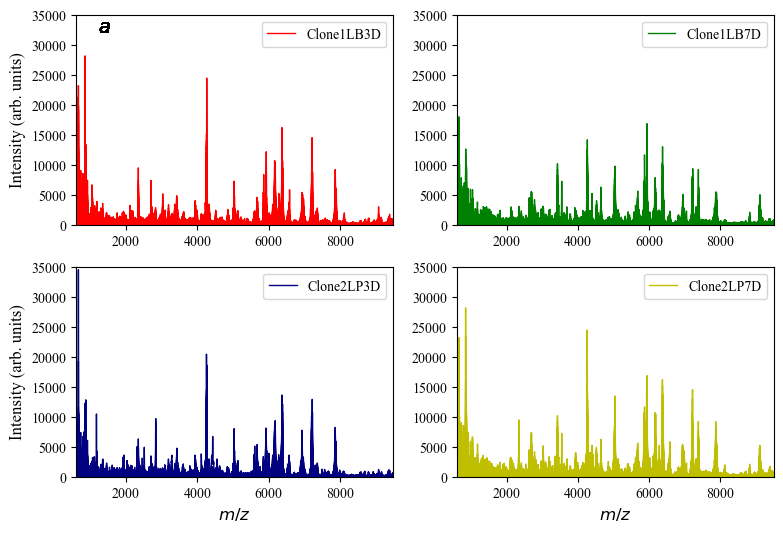

In [55]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(2,2, figsize=(9,6))
#handles, labels = ax.get_legend_handles_labels()
#from matplotlib.ticker import MultipleLocator, AutoMinorLocator
#plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.rcParams["font.family"] = 'Times New Roman'
il=-1
Dataintn=Dataintn.T.reset_index(drop=True).T
for c in Y[0]:
    il=il+1
    if c=='LB3D':
        cl='r'
        line1 = ax[0,0].plot(Dsna[0], Dataintn[il], color=cl, lw=1, label='Clone1LB3D')
        ax[0,0].set_xlim(600, 9500)
        ax[0,0].set_ylim(0, 35000)
        ax[0,0].set_ylabel('Intensity (arb. units)', fontsize=12)
        ax[0,0].text(1200, 32000, '$a$', fontsize = 14)
        ax[0,0].legend(line1[:2], ['Clone1LB3D'])
    if c=='LB7D':
        cl='g'
        line2=ax[0,1].plot(Dsna[0], Dataintn[il], color=cl, lw=1, label='Clone1LB7D')
        ax[0,1].legend(line2[:2], ['Clone1LB7D'])
        ax[0,1].set_xlim(600, 9500)
        ax[0,1].set_ylim(0, 35000)
    if c=='LP3D':
        cl='navy'
        line3 = ax[1,0].plot(Dsna[0], Dataintn[il], color=cl, lw=1, label='Clone2LP3D')
        ax[1,0].set_xlim(600, 9500)
        ax[1,0].set_ylim(0, 35000)
        ax[1,0].set_ylabel('Intensity (arb. units)', fontsize=12)
        ax[1,0].set_xlabel('$m/z$',  fontsize=12)
        ax[1,0].legend(line3[:2], ['Clone2LP3D'])
        
    else:
        cl='y'
        line4=ax[1,1].plot(Dsna[0], Dataintn[il], color=cl, lw=1, label='Clone2LP7D')
        ax[1,1].set_xlim(600, 9500)
        ax[1,1].set_ylim(0, 35000)
        ax[1,1].set_xlabel('$m/z$',  fontsize=12)
        ax[1,1].legend(line4[:2], ['Clone2LP7D'])
        
#fig2, ax2 = plt.subplots()

# Copy the first subplot to the new figure
#for line in ax[1, 1].lines:
#    ax2.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), color='y')

# Copy the title, labels, and other properties
#ax2.set_title(ax[1, 1].get_title())
#ax2.set_xlabel(ax[1, 1].get_xlabel())
#ax2.set_ylabel(ax[1, 1].get_ylabel())
#ax2.set_xlim(600, 9500)
#ax2.set_ylim(0, 35000)
#ax2.legend(line4[:2], ['Clone2LP7D'])

# Save the new figure with the single subplot
#fig2.savefig('subplot4.jpg', dpi=600, bbox_inches='tight')

# Display the new figure with the single subplot
#plt.show()
#ax.legend(u, ['Clone1LB3D', 'Clone1LB7D', 'Clone2LP3D', 'Clone2LP7D'])
#ax.set_xlabel('Number of data',  fontsize=16)
#ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("Figure_2a.jpg", dpi=600)
plt.show()

<font color=navy size=5>**Visualización con Bokeh**

In [42]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='FTIR', width=600, height=400, x_range=(500, 10000),
           x_axis_label='Dalton (m/z)', y_axis_label='Intensity (arb. units)', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.line(Dsnan[1], Dataintn[1], color='red', legend_label='Mass Spectra', line_width=2, alpha=1)
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

<font color=navy size=5>**Construimos un modelo no supervisado, PCA, utilizando los datos de intensidad escalado o normalizados, según como se desee.  Aquí se muestra el modelo los datos escalados**

In [131]:
#normalizamos los datos
from sklearn.preprocessing import StandardScaler, Normalizer, QuantileTransformer
scaler=StandardScaler()
#norma=Normalizer()
quantile_transformer = QuantileTransformer(random_state=0)
#X_train_trans = quantile_transformer.fit_transform(X_train)
#X_test_trans = quantile_transformer.transform(X_test)

scaler.fit(Dataintn) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Dataintn)# Ahora si, escalo los datos y los normalizo
x_n = quantile_transformer.fit_transform(Dataintn)
#x_norm = preprocessing.normalize(data_signals, norm='l1')# Normaliza los datos
#x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos}

In [133]:
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(x_scaled.T) # obtener los componentes principales
datos_pca=pca.transform(x_scaled.T) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (733, 9)
[0.22113911 0.14854364 0.08507605 0.07798916 0.066809   0.04928408
 0.02638089 0.02034331 0.0176533 ]
suma: 0.713218551077371


In [135]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,92.123951,-30.813594,15.128728,-33.001572,13.860905,-14.314403,12.776762,-7.690646,-6.771057
1,102.045997,41.925196,-26.157692,19.086729,-6.510546,-26.492290,12.238469,-9.969230,-11.278992
2,109.351064,23.022995,-15.593594,3.103849,-10.621178,-28.136515,5.103411,-12.846616,-8.913497
3,83.273458,70.540874,-19.188676,61.790305,-29.122220,19.445507,9.673900,7.773433,21.622908
4,92.763966,-64.820327,15.969860,-17.019132,-22.312921,-7.625923,11.057538,8.723271,-2.151898


<font color=DarkSlateBlue size=5>**Visualizamos el resultado del modelo asignando a cada tipo de muestra un color diferente con el fin de verificar si hay separación entre ellos.  El resultado no es bueno**

In [137]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
#colormap = {'LB3D': 'red', 'LB7D': 'green', 'LP3D': 'blue', 'LP7D': 'black'}
colormap = {'LB3D': 'red', 'LB7D': 'green', 'LP3D': 'black', 'LP7D': 'yellow'}
colors = [colormap[x] for x in Y1['Clase']]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', width=600, height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.scatter(datos_pca1[0], datos_pca1[1],  color=colors, legend_label='PCA', size=10, alpha=0.6)
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

<font color=PaleVioletRed size=5>**Implementaremos un nuevo modelo, en este caso supervisado, por tanto debemos darle un valor numerico a la variable dependiente. Utilizamos el codificador de *sklearn* y con vertimos la varaibles dependiente en números ordinales**

In [139]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit(Y1[['Clase']])
Y1_code = encoder.transform (Y1[['Clase']])
Y1_code = pd.DataFrame(Y1_code)
#Y1_code.to_excel('./Datos/Y_Les_Code.xlsx')
Dataintn.to_csv('./Datos/Int_mass_Les.csv')
Y1_code

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,2.0
...,...
728,2.0
729,2.0
730,2.0
731,2.0


<font color=DarkSlateGray size=5>**Implementamos un modelo *vectores de soporte*, SVC, utilizando los datos de intensidad y scalados y separandolos en dos grupos, set de entrenamiento y set de prueba, para poder evaluar el modelo.  Utilizamos una separación 80:20, aunque podria ser mayor teniendo el gran numero de muestras analizadas**

In [141]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, Y1_code, train_size   = 0.7, random_state = 1234, shuffle = True)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = 12, shuffle = True)

# Creación del modelo SVM lineal
# ==============================================================================
modelo1 = SVC(C = 60, kernel = 'linear', random_state=123)
modelo1.fit(X_tr2, y_tr2)
#modelo2 = SVC(C = 40, kernel = 'rbf', random_state=123)
#modelo2.fit(X_tr2, y_tr2)

SVC(C=60, kernel='linear', random_state=123)

In [142]:
# Predicciones test
# ==============================================================================
predicciones = modelo1.predict(X_te2)
predicciones

array([0., 2., 0., 1., 3., 3., 1., 3., 3., 3., 1., 0., 2., 3., 1., 3., 2.,
       0., 1., 1., 0., 0., 1., 3., 0., 1., 1., 2., 2., 2., 0., 2., 3., 1.,
       3., 2., 2., 1., 1., 3., 2., 1., 2., 1., 3., 0., 3., 0., 2., 2., 2.,
       0., 3., 2., 1., 0., 0., 0., 0., 1., 3., 3., 3., 3., 1., 1., 2., 2.,
       0., 3., 3., 0., 0., 2., 1., 0., 3., 2., 1., 0., 2., 0., 1., 0., 1.,
       3., 3., 3., 1., 2., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 2., 2.,
       2., 2., 2., 0., 3., 2., 2., 1., 3., 2., 3., 0., 3., 2., 3., 3., 3.,
       2., 1., 0., 0., 3., 2., 2., 1., 3., 1., 2., 3., 2., 2., 3., 2., 1.,
       0., 2., 1., 0., 0., 0., 2., 3., 0., 2., 3.])

In [143]:
accuracy = accuracy_score(y_te2, predicciones, normalize = True)
precision = precision_score(y_te2, predicciones, average='weighted')
recall = recall_score(y_te2, predicciones, average='weighted')
f1 = f1_score(y_te2, predicciones, average='weighted')

In [144]:
from sklearn.feature_selection import RFE
# Create an RFE object
rfe = RFE(estimator=modelo1, n_features_to_select=100)

# Fit the RFE object to the data
rfe.fit(X_tr2, y_tr2)

# Get the selected features
selected_features = X_tr2.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

KeyboardInterrupt: 

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(y_true = y_te2, y_pred = predicciones, normalize = True)
print("")
print(f"El accuracy de test es: {100*accuracy}%")

In [ ]:
modelo1.coef_

<font color=Maroon size=4>**Como utilizamos un patrón randómico para la separación de las muestras en los dos grupo, podría pasar que eésta no se la mejor separación. Por ello, vamos a realizar varios modelos cambiando el patrón randómico a paratir de variación en el argumento *random-state*.  De esta manera encontramos una mejor separación.  Antes de esto creamos una función que realice modelo y calcule las predicciones y la exactitud**

In [ ]:
def opt_svc(X, y, xt, rs):
    
    # Definimos PLS y el número de componentes
    svc = SVC(C = 40, kernel = 'rbf', random_state=123)
    #svc = SVC(C = 40, kernel = 'linear', random_state=123)
    svc.fit(X, y)
    y_pred = svc.predict(x_test)
    # Calculamos métricas
    ex = accuracy_score(y_true = y_test, y_pred = y_pred, normalize = True)
        
    return (y_pred, ex)

In [ ]:
# Probamos con 30 componentes
exs = []
yps = []
rss = []
arr_rs = np.arange(1, 201)

for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rs, shuffle = True)
    y_pred, ex = opt_svc(x_train, y_train, x_test, rs)
    rss.append(rs)
    yps.append(y_pred)
    exs.append(ex)

In [ ]:
np.max(exs), rss[np.argmax(exs)]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)
# Creación del modelo SVM 
svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
ex_svc

<font color=DarkSlateBlue size=5>**Observamos una leve variación en la exactitud cuando corremos cien modelos variando el patrón randómico de separación, el valor *rs* que da este valor es de 95.  Sin embargo, con un número mayor de modelos (200), encontramos una exactitud de 100%**

<font color=red size=5>**Ahora utilizamos el mismo patrón randómico de separación para implementar un modelo de clasificación utilizando una red neuronal.**

In [ ]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X=x_train, y=y_train)

<font color=green size=5>**Calculamos la predicción y la exactitud en la predicción utilizando el set de prueba**

In [ ]:
y_pred = ann.predict(x_test)
score = ann.score(x_test, y_test)
score

<font color=green size=5>**Visualizamos la matriz de confusión para ver donde acierta y donde falla**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
M=confusion_matrix(y_test, y_pred_svc)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(M, index = [i for i in ['LB3D', 'LB7D', 'LP3D', 'LP7D']],
              columns = [i for i in ['LB3D', 'LB7D', 'LP3D', 'LP7D']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Greens", cbar=False)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.savefig('conf_ma.png', dpi=200)
plt.show()

<font color=blue size=5>**Finalmente generamos un soporte**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

<font color=red size=5>**Ahora vamos a Guardar el modelo entrenado.  Empezaremos por el modelo *SVC* y luego el modelo de redes neuronales**

In [ ]:
import sklearn.externals
import joblib

File_svc = "Mod_Clas_Lesh_svc.pkl"
joblib.dump(svc1, File_svc)

In [ ]:
File_ann = "Mod_Clas_Lesh_ann.pkl"
joblib.dump(ann, File_ann)

<font color=red size=5>**Si deseamos cargar el modelo, ejecutamos las siguientes líneas**

In [ ]:
Model_svc =joblib.load('Mod_Clas_Lesh_svc.pkl')

In [ ]:
#Pred=Model_svc.(x_test)
sc=Model_svc.score(x_test, y_test)
sc

<font color=MediumOrchid size=5>**Vamos a probar con otros métodos de Clasificación, empecemos con *Random Forest* que ha tenido mucha acogida en los últimos años.  Adicionalmente, para este clasificador podemos obtener las variables más importantes**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# Variables importantes en el modelo
v_imp = rfc.feature_importances_
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

In [ ]:
df_cm = pd.DataFrame(M, index = [i for i in ['LB3D', 'LB7D', 'LP3D', 'LP7D']],
              columns = [i for i in ['LB3D', 'LB7D', 'LP3D', 'LP7D']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Greens", cbar=False)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.savefig('conf_ma.png', dpi=200)
plt.show()

<font color=DarkBlue size=5>**El Clasificador *XG Boost* y sus variables importantes**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
# variables más importantes del modelo
v_imp = xgb.feature_importances_
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

<font color=DarkMagenta size=5>**Algunos modelos de clasificación como el *KNN, SVC, ANN* no es posible utilizar la función *feature_importances_* de *sk-learn*, pero se puede encontra esas variables de mayor importancia para el modelo, utilizando la función *permutation_importance* y luego *importances_mean*, como se muestra aquí:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
# Variables de más importancia
res = permutation_importance(knc, x_train, y_train, scoring='accuracy')
v_imp = res.importances_mean
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
res = permutation_importance(knc, x_train, y_train, scoring='accuracy')
v_impLR = res.importances_mean
plt.plot(v_impLR)
print('Score: %.2f' % rfc.score(x_test, y_test))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=586), max_features=5000)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
X_train_fs.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
knc = KNeighborsClassifier()
# fit the model
knc.fit(X_train_fs, y_train)
knc.score(X_test_fs, y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
#x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X_train_fs, y_train)
ann.score(X_test_fs, y_test)

In [ ]:
svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(X_train_fs, y_train)
svc1.score(X_test_fs, y_test)

In [ ]:
results = permutation_importance(ann, X_train_fs, y_train, scoring='accuracy')

In [ ]:
plt.plot(results.importances_mean);

In [ ]:
%pwd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
X = pd.read_csv('./Datos/Int_mass_Les.csv')  # Features
y = pd.read_excel('./Datos/Y_Les_Code.xlsx')  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.values.ravel(), test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)